In [4]:
import os
import numpy as np
import panel as pn
pn.extension('plotly')
import plotly.express as px

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import holoviews as hv
import hvplot.pandas
from plotly import subplots 
from plotly import tools 
import chart_studio
import chart_studio.plotly as py

import cufflinks as cf
cf.set_config_file(theme='solar', 
                   sharing='public', 
                   offline=True,
                   offline_connected=True,
                   offline_show_link=True) # #List of Cufflinks Themes :  ['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']
%matplotlib inline

## Read in all csv files for analysis for Australia

In [5]:
#Load csv files
asx = pd.read_csv("../Data/ProcessedData/asx_june_cleaned.csv")
btc = pd.read_csv("../Data/ProcessedData/BTC_USD_df.csv")
gdp = pd.read_csv("../Data/ProcessedData/GDP_selected_countries_cleaned.csv")
gdp_bar = pd.read_csv("../Data/ProcessedData/GDP_selected_countries_cleaned.csv")
cash_rate = pd.read_csv("../Data/ProcessedData/cashrate_cleaned.csv")
population = pd.read_csv("../Data/ProcessedData/Population_June_Cleaned.csv")
employment = pd.read_csv("../Data/ProcessedData/employment_cleaned.csv")
economy = pd.read_csv("../Data/ProcessedData/Economy_June_Cleaned.csv")
household_income = pd.read_csv("../Data/ProcessedData/Household_Income_cleaned.csv")
sp500 = pd.read_csv("../Data/ProcessedData/SP500_history_cleaned.csv")

## 

## What does the Australian GDP look like? Is AUS GDP similar for the same time-period (1995 - 2020) across countries in similar economic arenas?

In [6]:
# Rename Year column
gdp_new = gdp.rename(columns={"Unnamed: 0": "Year"})
gdp_bar_new = gdp.rename(columns={"Unnamed: 0": "Year"})

# Set index for 1st df and convert Year to object for 2nd df
gdp_new.set_index("Year", inplace=True)
gdp_bar_new["Year"] = gdp_bar_new.Year.astype(str)
#gdp_drop_unnamed = gdp_new.loc[:, ~gdp_new.columns.str.contains('^Unnamed')]

In [7]:
#Create bar chart
gdp_hvplot_bar = gdp_bar_new.hvplot.bar(ylabel='GDP (% change)',
                                        groupby="Year",
                                        title="GDP across all countries")
gdp_hvplot_bar

:DynamicMap   [Year]
   :Bars   [index,Variable]   (value)

In [8]:
#Create line plots
gdp_hvplot_line = gdp_new.hvplot.line(ylabel='GDP (% change)',
                                      title="GDP across all countries",
                                      line_dash='dotted',
                                      line_alpha=0.5)
gdp_hvplot_line

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [9]:
# Combine the plots above to put them into one pane
comb_gdp = gdp_hvplot_line + gdp_hvplot_bar 
comb_gdp

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Year]   (value)
   .DynamicMap.I :DynamicMap   [Year]
      :Bars   [index,Variable]   (value)

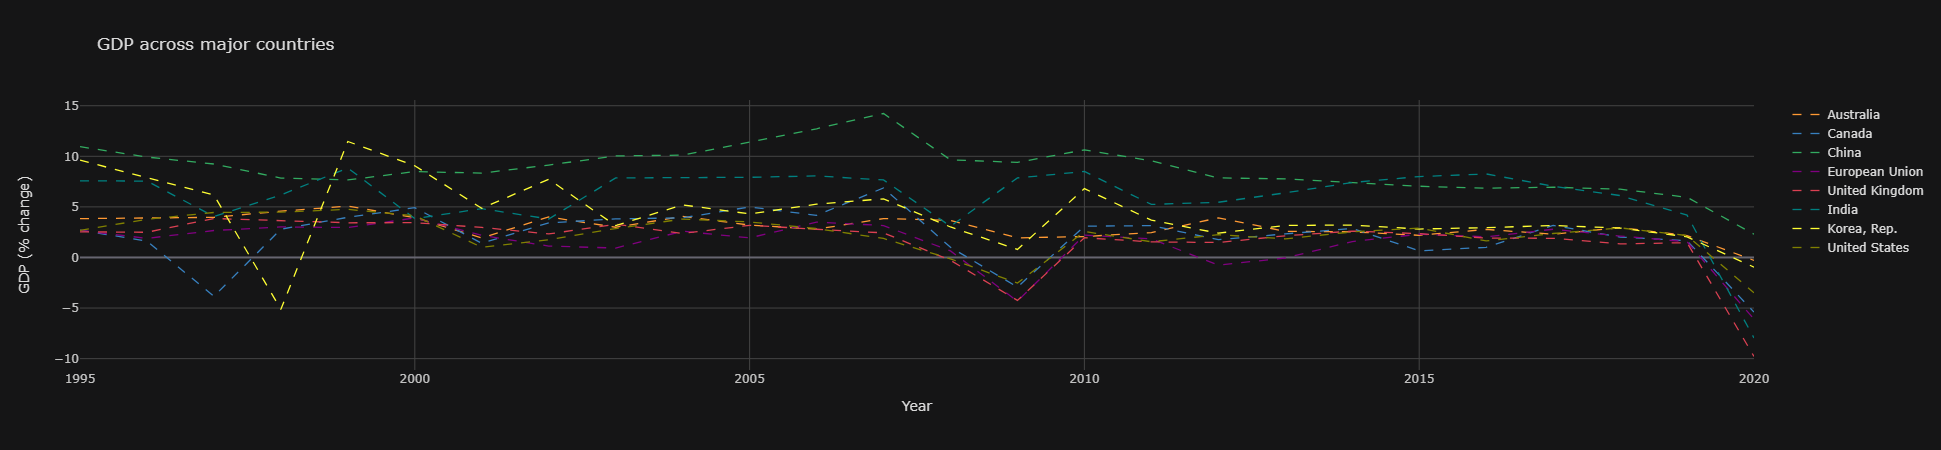

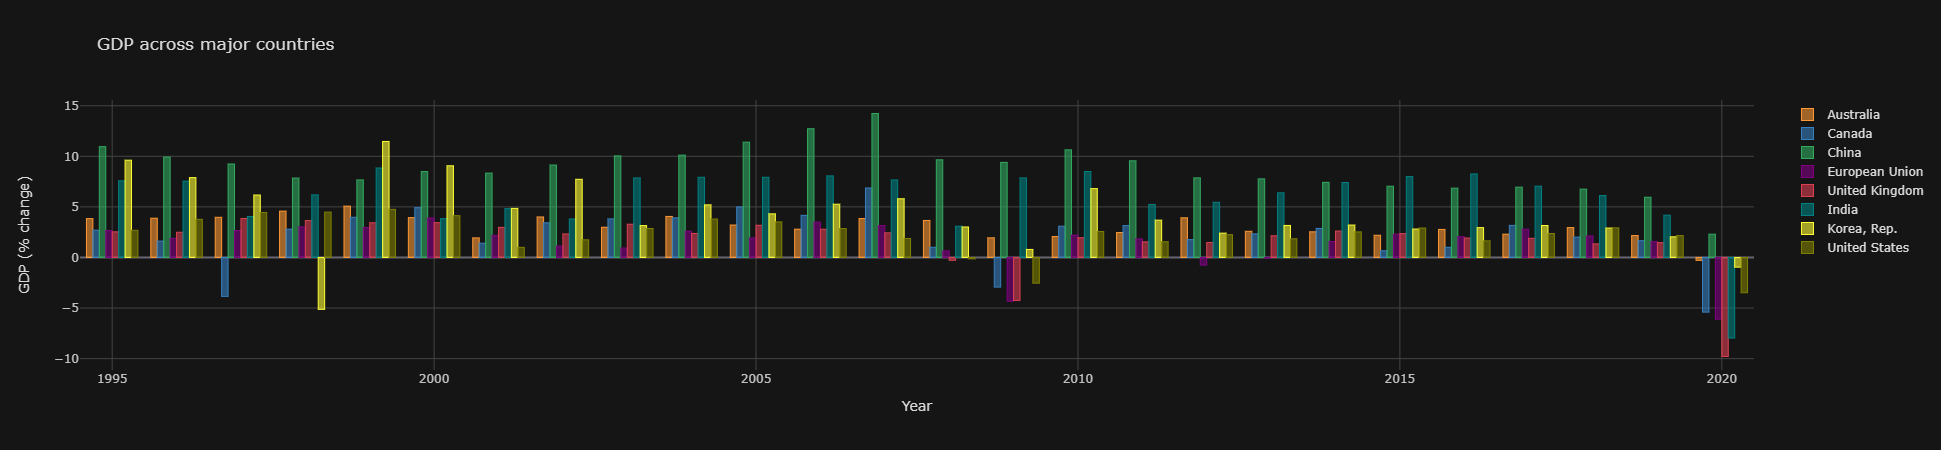

Layout({
    'height': 600,
    'template': '...',
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.575, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.425]}
})

In [10]:
# Generate same plots as above but using cufflinks
gdp_fig1 = gdp_new.iplot(kind='line',
                         dash='dash',
                         title="GDP across major countries",
                         xTitle="Year",
                         yTitle='GDP (% change)',
                         asImage=True,
                         filename='GDP_world_line')             
             
gdp_fig2 = gdp_new.iplot(kind='bar',
                         dash='dash',
                         title="GDP across major countries",
                         xTitle="Year",
                         yTitle='GDP (% change)',
                         asImage=True,
                         filename='GDP_world_bar')

#Create the plot matrix:
fig = subplots.make_subplots(rows=2, cols=1)

#Add traces, use  'add_traces', or 'append_trace'.
fig.add_traces(gdp_fig1)
fig.add_traces(gdp_fig2)

fig['layout'].update(height=600,
                     width=600)

## 

### 

## What does Australia's demographic information look like?

In [11]:
# Get demogrpahic data
year = population[["Year"]]

total_population = population[["EstimatedResidentPopulation"]]
total_employed = employment[["TotalEmployed"]]
total_employed_males = employment[["TotalEmployed_M"]]
total_employed_females = employment[["TotalEmployed_F"]]
total_unemployed = employment[["TotalUnemployed"]]
total_unemployed_males = employment[["TotalUnemployed_M"]]
total_unemployed_females = employment[["TotalUnemployed_F"]]

In [12]:
# Create df to correlate
aus_demographics_df = pd.concat([year,      
                                 total_population,
                                 total_employed, 
                                 total_employed_males,
                                 total_employed_females,
                                 total_unemployed,
                                 total_unemployed_males,
                                 total_unemployed_females], axis=1)

# Rename to easy convention
aus_demographics_renamed_df = aus_demographics_df.rename(columns={"EstimatedResidentPopulation": "Pop",
                                                                  "TotalEmployed": "Tot Emp",
                                                                  "TotalEmployed_M": "Tot Emp_M",
                                                                  "TotalEmployed_F": "Tot Emp_F",
                                                                  "TotalUnemployed": "Tot Unemp",
                                                                  "TotalUnemployed_M": "Tot Unemp_M",
                                                                  "TotalUnemployed_F": "Tot Unemp_F"})

#Check dataset
aus_demographics_renamed_df.set_index("Year", inplace=True)
aus_demographics_renamed_df.head()

,Pop,Tot Emp,Tot Emp_M,Tot Emp_F,Tot Unemp,Tot Unemp_M,Tot Unemp_F
Year,,,,,,,
1995,18004.9,8205.6,4657.4,3548.3,723.5,434.2,289.3
1996,18224.8,8311.7,4724.4,3587.3,723.8,424.3,299.5
1997,18423.0,8345.6,4731.9,3613.6,735.2,427.5,307.7
1998,18607.6,8516.8,4801.8,3715.0,702.8,419.9,282.9
1999,18812.3,8673.2,4897.8,3775.5,600.6,348.6,252.0


In [13]:
# Create second dataframe without total population
aus_demographics_renamed_d2 = aus_demographics_renamed_df.drop("Pop", axis=1)

aus_demographics_renamed_d2.head()

,Tot Emp,Tot Emp_M,Tot Emp_F,Tot Unemp,Tot Unemp_M,Tot Unemp_F
Year,,,,,,
1995,8205.6,4657.4,3548.3,723.5,434.2,289.3
1996,8311.7,4724.4,3587.3,723.8,424.3,299.5
1997,8345.6,4731.9,3613.6,735.2,427.5,307.7
1998,8516.8,4801.8,3715.0,702.8,419.9,282.9
1999,8673.2,4897.8,3775.5,600.6,348.6,252.0


In [14]:
# Clean dataframe
demographic_corr_df = aus_demographics_renamed_df.reset_index()
del demographic_corr_df["Year"]
demographic_corr_df.head()

# Run correlation
demographic_corr = demographic_corr_df.corr()
demographic_corr

,Pop,Tot Emp,Tot Emp_M,Tot Emp_F,Tot Unemp,Tot Unemp_M,Tot Unemp_F
Pop,1.000000,0.988475,0.983934,0.991038,0.363551,0.114982,0.647975
Tot Emp,0.988475,1.000000,0.999140,0.999353,0.228864,-0.022022,0.533304
Tot Emp_M,0.983934,0.999140,1.000000,0.997002,0.207767,-0.043831,0.515813
Tot Emp_F,0.991038,0.999353,0.997002,1.000000,0.246857,-0.003061,0.547741
Tot Unemp,0.363551,0.228864,0.207767,0.246857,1.000000,0.959710,0.927733
Tot Unemp_M,0.114982,-0.022022,-0.043831,-0.003061,0.959710,1.000000,0.785476
Tot Unemp_F,0.647975,0.533304,0.515813,0.547741,0.927733,0.785476,1.000000


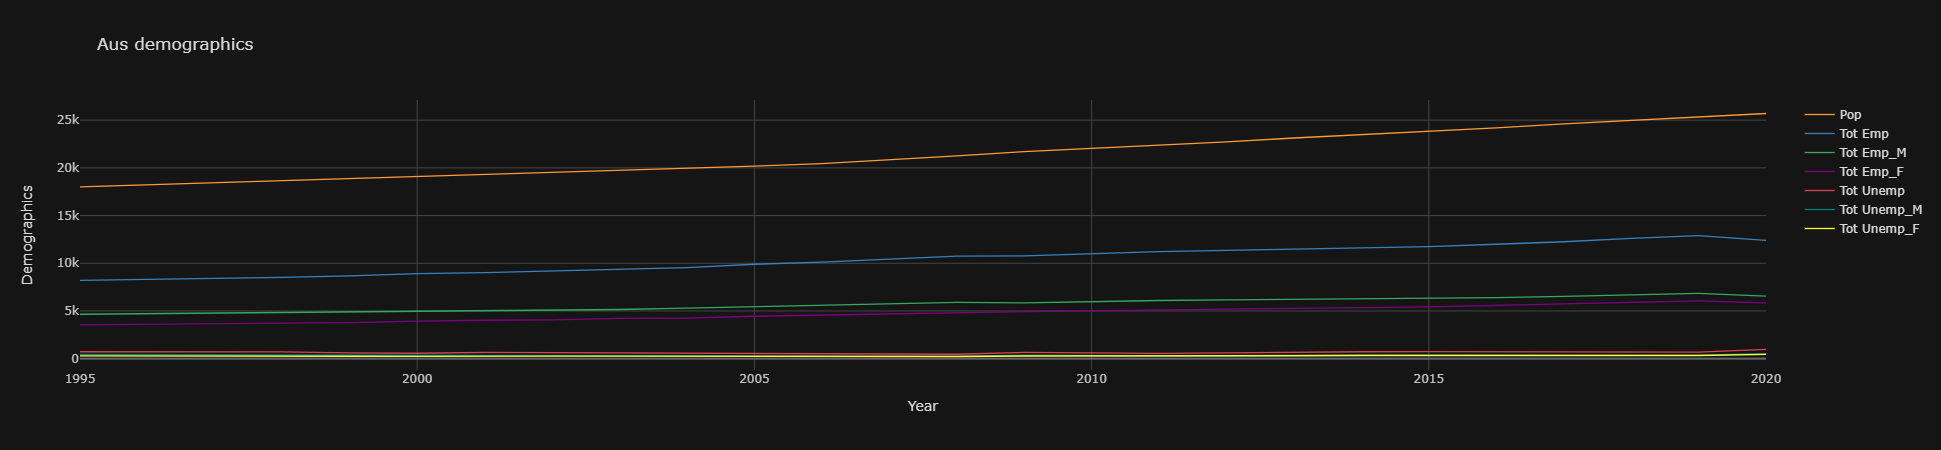

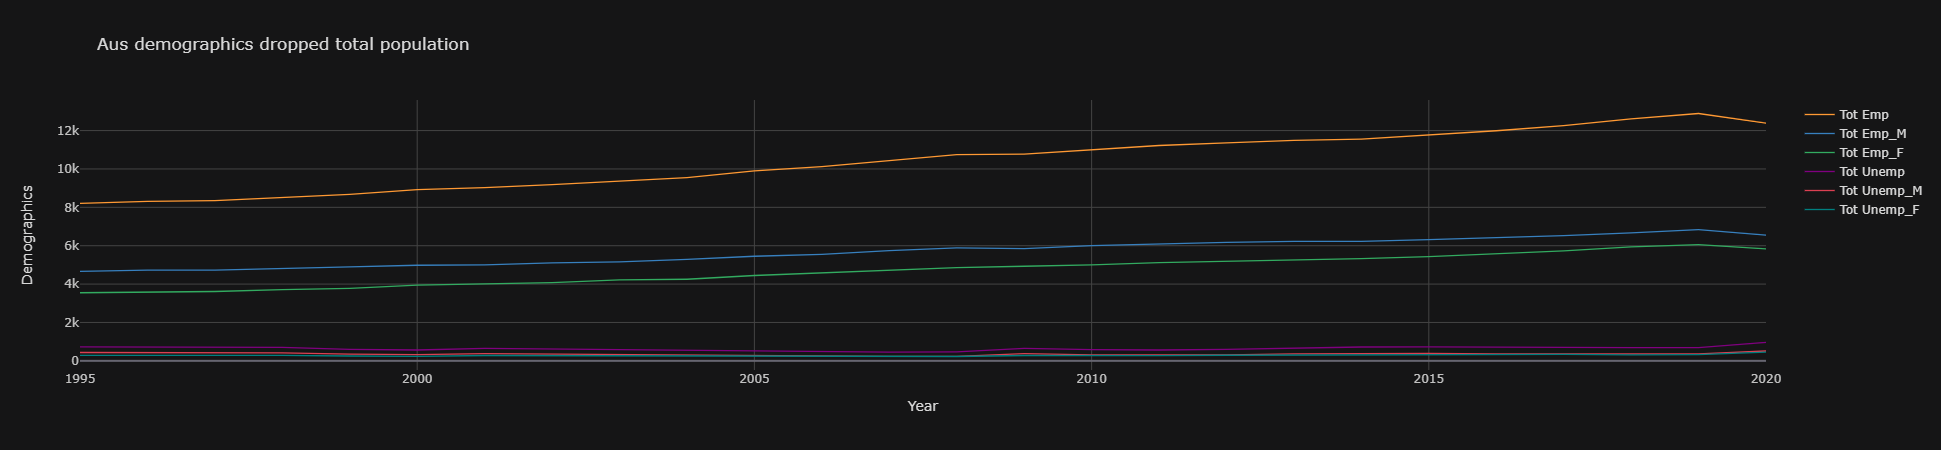

Layout({
    'height': 600,
    'template': '...',
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
    'xaxis3': {'anchor': 'y3', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.7333333333333333, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.36666666666666664, 0.6333333333333333]},
    'yaxis3': {'anchor': 'x3', 'domain': [0.0, 0.26666666666666666]}
})

In [15]:
# Generate line graphs using Cufflinks
aus_demographics_fig1 = aus_demographics_renamed_df.iplot(kind='line',
                                             title="Aus demographics",
                                             xTitle="Year",
                                             yTitle='Demographics')         
             
aus_demographics_fig2 = aus_demographics_renamed_d2.iplot(kind='line',
                                                          title="Aus demographics dropped total population",
                                                          xTitle="Year",
                                                          yTitle='Demographics')  

#Create the plot matrix:
fig = subplots.make_subplots(rows=3, cols=1)

#Add traces, use  'add_traces', or 'append_trace'.
fig.add_traces(aus_demographics_fig1)
fig.add_traces(aus_demographics_fig2)

fig['layout'].update(height=600,
                     width=600)

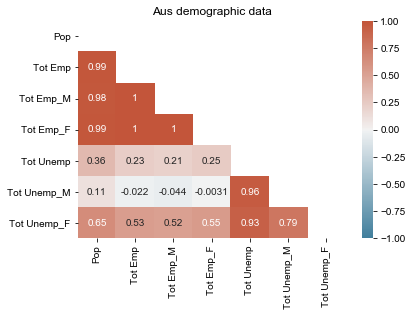

In [16]:
# Generate heatmap using Seaborn
matrix = np.triu(demographic_corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
h = plt.axes()

plot = sns.heatmap(demographic_corr, 
                   vmin=-1, 
                   vmax=1, 
                   annot=True,
                   cmap=cmap, 
                   mask=matrix)

sns.set(rc={'figure.figsize':(10,7)})
h.set_title('Aus demographic data')
plot.figure.savefig("../Images/Aus_Demographics_CorrelationPlot.png")

## 

### 

## What does Australia's financials look like?

In [17]:
# Get Australia's financial data
year = population[["Year"]]
asx_price = asx[["Price"]]
cash_rate_target = cash_rate[["Cash Rate Target"]]
overnight_cash_rate = cash_rate[["Interbank Overnight Cash Rate"]]
household_income_total = household_income[["TotalIncome"]]
household_savings_total = household_income[["TotalSavings"]]
net_savings = economy[["Net Savings"]]
gross_income = economy[["Total Use of Gross Income"]]

In [18]:
# Create df to correlate
aus_financials_df = pd.concat([year,
                               cash_rate_target,
                               overnight_cash_rate,
                               household_income_total,
                               household_savings_total,
                               net_savings,
                               gross_income], axis=1)

# Rename to easy convention
aus_financials_renamed_df = aus_financials_df.rename(columns={"Total Use of Gross Income": "Gross Income"})

#Check dataset
aus_financials_renamed_df.set_index("Year", inplace=True)
aus_financials_renamed_df.head()

,Cash Rate Target,Interbank Overnight Cash Rate,TotalIncome,TotalSavings,Net Savings,Gross Income
Year,,,,,,
1995,7.50,7.51,107093,313,313,107093
1996,7.50,7.51,113630,853,853,113630
1997,5.50,5.57,120328,1617,1617,120328
1998,5.00,5.07,124565,-1596,-1596,124565
1999,4.75,4.76,133049,-1208,-1208,133049


In [19]:
# Create dataframe without Gross Income
aus_financials_renamed_d2 = aus_financials_renamed_df.drop(["Gross Income"], axis=1)

aus_financials_renamed_d2.head()

,Cash Rate Target,Interbank Overnight Cash Rate,TotalIncome,TotalSavings,Net Savings
Year,,,,,
1995,7.50,7.51,107093,313,313
1996,7.50,7.51,113630,853,853
1997,5.50,5.57,120328,1617,1617
1998,5.00,5.07,124565,-1596,-1596
1999,4.75,4.76,133049,-1208,-1208


In [20]:
# Run correlation
aus_financials_corr_df = aus_financials_renamed_df.reset_index()
del aus_financials_corr_df["Year"]
aus_financials_corr = aus_financials_corr_df.corr()
aus_financials_corr

,Cash Rate Target,Interbank Overnight Cash Rate,TotalIncome,TotalSavings,Net Savings,Gross Income
Cash Rate Target,1.000000,0.999915,-0.848601,-0.492007,-0.492007,-0.848601
Interbank Overnight Cash Rate,0.999915,1.000000,-0.850912,-0.499262,-0.499262,-0.850912
TotalIncome,-0.848601,-0.850912,1.000000,0.456788,0.456788,1.000000
TotalSavings,-0.492007,-0.499262,0.456788,1.000000,1.000000,0.456788
Net Savings,-0.492007,-0.499262,0.456788,1.000000,1.000000,0.456788
Gross Income,-0.848601,-0.850912,1.000000,0.456788,0.456788,1.000000


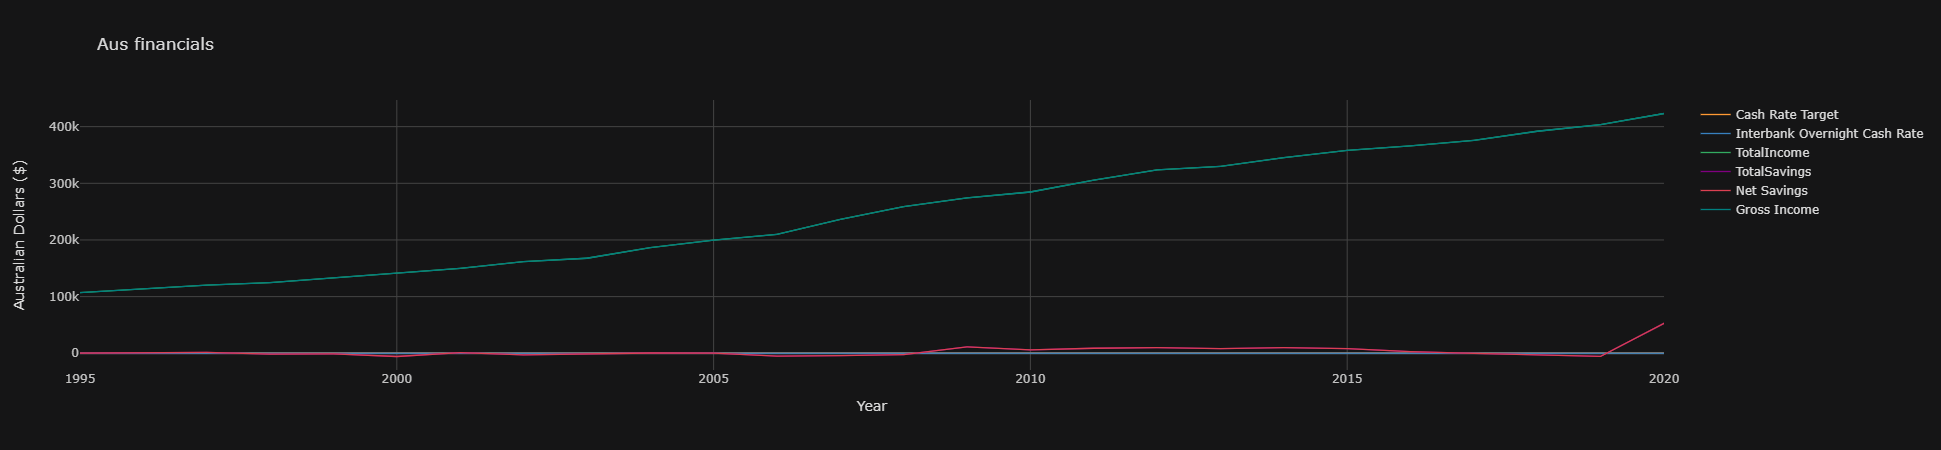

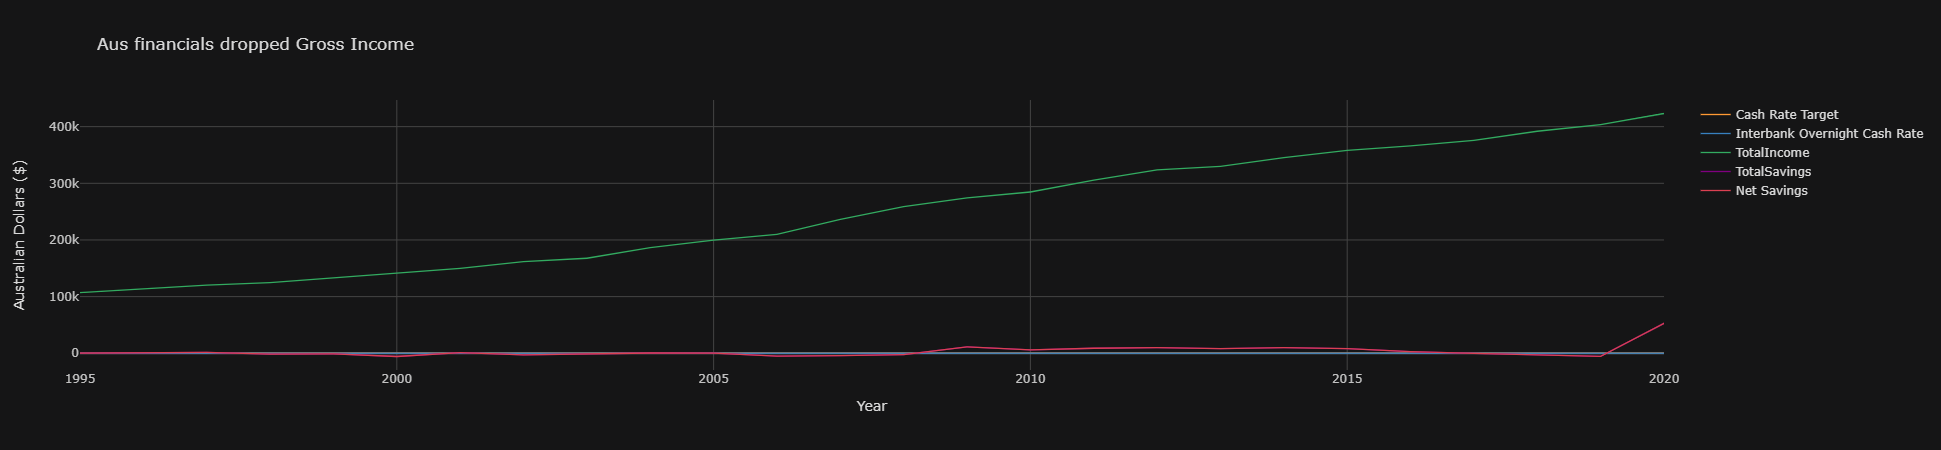

Layout({
    'height': 600,
    'template': '...',
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.575, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.425]}
})

In [21]:
# Create line plots using Cufflink
aus_financials_fig1 = aus_financials_renamed_df.iplot(kind='line',
                                                        title="Aus financials",
                                                        xTitle="Year",
                                                        yTitle='Australian Dollars ($)')        
             
aus_financials_fig2 = aus_financials_renamed_d2.iplot(kind='line',
                                                        title="Aus financials dropped Gross Income",
                                                        xTitle="Year",
                                                        yTitle='Australian Dollars ($)')    

#Create the plot matrix:
fig = subplots.make_subplots(rows=2, cols=1)

#Add traces, use  'add_traces', or 'append_trace'.
fig.add_traces(aus_financials_fig1)
fig.add_traces(aus_financials_fig2)

fig['layout'].update(height=600,
                     width=600)

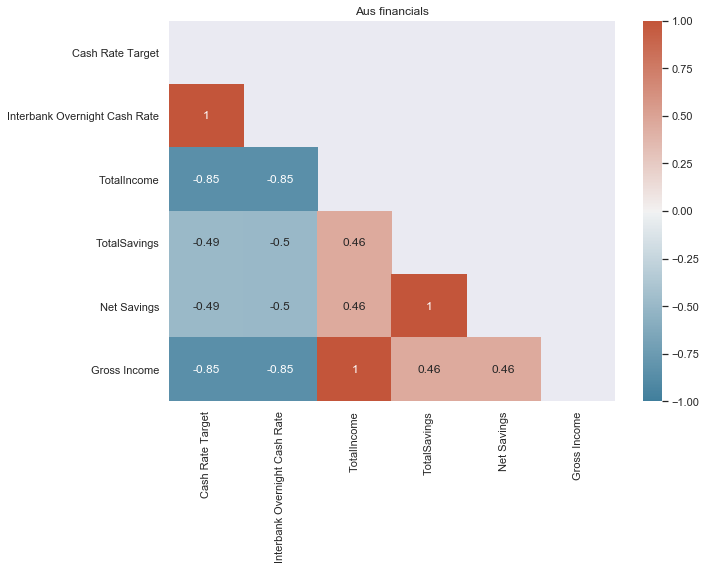

In [22]:
# Create heatmap using Seaborn
matrix = np.triu(aus_financials_corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
h = plt.axes()

plot = sns.heatmap(aus_financials_corr, 
                   vmin=-1, 
                   vmax=1, 
                   annot=True,
                   cmap=cmap, 
                   mask=matrix)

sns.set(rc={'figure.figsize':(10,7)})
h.set_title('Aus financials')
plot.figure.savefig("../Images/Aus_Financials_CorrelationPlot.png")

## 

## 

## What are the key factors driving GDP - demonstrate using CorrPlot


In [23]:
# Clean population data
del population["Unnamed: 0"]
population.head()

,Year,Births,Deaths,NaturalIncreases,InterstateArrivals,OverseasArrivals,OverseasDepartures,NetOverseasDepartures,NetOverseasMigration,EstimatedResidentPopulation,PercenChangeOverThePreviousYear
0,1995,64.3,31.5,32.8,96.0,50.5,32.7,32.7,23.8,18004.9,1.12
1,1996,62.0,31.7,30.3,84.8,49.9,34.2,34.2,20.6,18224.8,1.22
2,1997,63.6,31.4,32.2,90.0,49.5,38.9,38.9,6.1,18423.0,1.09
3,1998,62.3,31.8,30.5,89.4,54.1,45.6,45.6,8.5,18607.6,1.00
4,1999,62.7,32.2,30.5,89.2,55.6,40.8,40.8,14.8,18812.3,1.10


In [24]:
# Get data to run correlation
year = population[["Year"]]
gdp_aus_new = gdp_new[["Australia"]].reset_index(drop=True)

total_population = population[["EstimatedResidentPopulation"]]
total_employed = employment[["TotalEmployed"]]
total_employed_males = employment[["TotalEmployed_M"]]
total_employed_females = employment[["TotalEmployed_F"]]
total_unemployed = employment[["TotalUnemployed"]]
total_unemployed_males = employment[["TotalUnemployed_M"]]
total_unemployed_females = employment[["TotalUnemployed_F"]]

cash_rate_target = cash_rate[["Cash Rate Target"]]
overnight_cash_rate = cash_rate[["Interbank Overnight Cash Rate"]]
household_income_total = household_income[["TotalIncome"]]
household_savings_total = household_income[["TotalSavings"]]
net_savings = economy[["Net Savings"]]
gross_income = economy[["Total Use of Gross Income"]]

In [25]:
# Create df to correlate
correlation_df = pd.concat([gdp_aus_new,
                            total_population,
                            total_employed, 
                            total_employed_males,
                            total_employed_females,
                            total_unemployed,
                            total_unemployed_males,
                            total_unemployed_females,
                            cash_rate_target,
                            overnight_cash_rate,
                            household_income_total,
                            household_savings_total,
                            net_savings,
                            gross_income], axis=1)

# Rename to easy convention
correlation_renamed_df = correlation_df.rename(columns={"Australia": "Aus_GDP",
                                                        "EstimatedResidentPopulation": "Pop",
                                                        "TotalEmployed": "Tot Emp",
                                                        "TotalEmployed_M": "Tot Emp_M",
                                                        "TotalEmployed_F": "Tot Emp_F",
                                                        "TotalUnemployed": "Tot Unemp",
                                                        "TotalUnemployed_M": "Tot Unemp_M",
                                                        "TotalUnemployed_F": "Tot Unemp_F",
                                                        "Total Use of Gross Income": "Gross Income"})

#Check dataset
correlation_renamed_df.head()

,Aus_GDP,Pop,Tot Emp,Tot Emp_M,Tot Emp_F,Tot Unemp,Tot Unemp_M,Tot Unemp_F,Cash Rate Target,Interbank Overnight Cash Rate,TotalIncome,TotalSavings,Net Savings,Gross Income
0,3.837755,18004.9,8205.6,4657.4,3548.3,723.5,434.2,289.3,7.50,7.51,107093,313,313,107093
1,3.878585,18224.8,8311.7,4724.4,3587.3,723.8,424.3,299.5,7.50,7.51,113630,853,853,113630
2,3.966538,18423.0,8345.6,4731.9,3613.6,735.2,427.5,307.7,5.50,5.57,120328,1617,1617,120328
3,4.576689,18607.6,8516.8,4801.8,3715.0,702.8,419.9,282.9,5.00,5.07,124565,-1596,-1596,124565
4,5.073599,18812.3,8673.2,4897.8,3775.5,600.6,348.6,252.0,4.75,4.76,133049,-1208,-1208,133049


In [26]:
# Run correlation on the full Aus dataset
correlation = correlation_renamed_df.corr()
correlation

,Aus_GDP,Pop,Tot Emp,Tot Emp_M,Tot Emp_F,Tot Unemp,Tot Unemp_M,Tot Unemp_F,Cash Rate Target,Interbank Overnight Cash Rate,TotalIncome,TotalSavings,Net Savings,Gross Income
Aus_GDP,1.000000,-0.691931,-0.656788,-0.639940,-0.670489,-0.491373,-0.325596,-0.649577,0.648218,0.654225,-0.682152,-0.691543,-0.691543,-0.682152
Pop,-0.691931,1.000000,0.988475,0.983934,0.991038,0.363551,0.114982,0.647975,-0.876944,-0.879178,0.995997,0.450761,0.450761,0.995997
Tot Emp,-0.656788,0.988475,1.000000,0.999140,0.999353,0.228864,-0.022022,0.533304,-0.817632,-0.819762,0.992518,0.370157,0.370157,0.992518
Tot Emp_M,-0.639940,0.983934,0.999140,1.000000,0.997002,0.207767,-0.043831,0.515813,-0.802005,-0.804060,0.990877,0.361270,0.361270,0.990877
Tot Emp_F,-0.670489,0.991038,0.999353,0.997002,1.000000,0.246857,-0.003061,0.547741,-0.830057,-0.832250,0.992560,0.377359,0.377359,0.992560
Tot Unemp,-0.491373,0.363551,0.228864,0.207767,0.246857,1.000000,0.959710,0.927733,-0.577171,-0.577743,0.325373,0.650468,0.650468,0.325373
Tot Unemp_M,-0.325596,0.114982,-0.022022,-0.043831,-0.003061,0.959710,1.000000,0.785476,-0.386829,-0.386224,0.073991,0.526550,0.526550,0.073991
Tot Unemp_F,-0.649577,0.647975,0.533304,0.515813,0.547741,0.927733,0.785476,1.000000,-0.757456,-0.759517,0.618355,0.733091,0.733091,0.618355
Cash Rate Target,0.648218,-0.876944,-0.817632,-0.802005,-0.830057,-0.577171,-0.386829,-0.757456,1.000000,0.999915,-0.848601,-0.492007,-0.492007,-0.848601
Interbank Overnight Cash Rate,0.654225,-0.879178,-0.819762,-0.804060,-0.832250,-0.577743,-0.386224,-0.759517,0.999915,1.000000,-0.850912,-0.499262,-0.499262,-0.850912


In [27]:
# Create heatmap using hvplot
heatmap_plot = correlation.hvplot.heatmap(title="Aus economy",
                                          ymarks_hover_color='cyan',
                                          hover_color='cyan',
                                          alpha=0.9,
                                          colorbar=True,
                                          cmap='bjy')
heatmap_plot

:HeatMap   [columns,index]   (value)

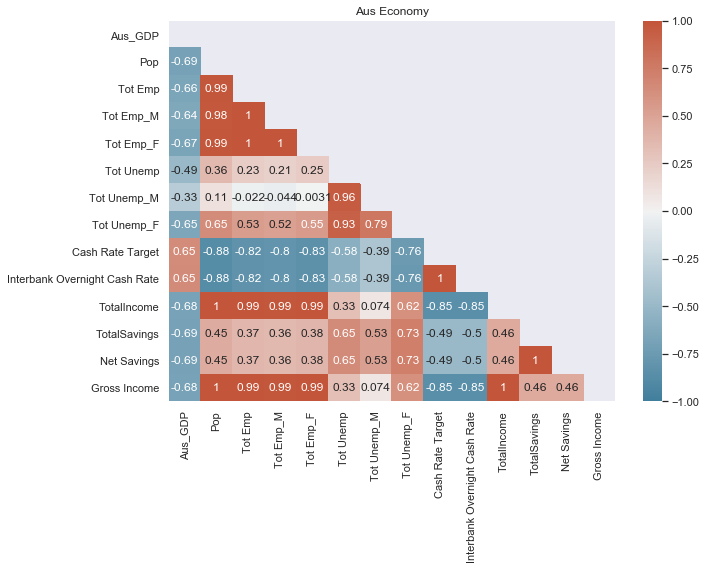

In [28]:
# Create heatmap using Seaborn
matrix = np.triu(correlation)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
h = plt.axes()

plot = sns.heatmap(correlation, 
                   vmin=-1, 
                   vmax=1, 
                   annot=True,
                   cmap=cmap, 
                   mask=matrix)


sns.set(rc={'figure.figsize':(10,7)})
h.set_title('Aus Economy')
plot.figure.savefig("../Images/Aus_AllMeasures_CorrelationPlot.png")

C:\Users\TribThapa\anaconda3\envs\pyvizenv\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\TribThapa\anaconda3\envs\pyvizenv\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\TribThapa\anaconda3\envs\pyvizenv\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\TribThapa\anaconda3\envs\pyvizenv\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\TribThapa\anaconda3\envs\pyvizenv\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\TribThapa\anaconda3\envs\pyvizenv\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\TribThapa\anaconda3\envs\pyvizenv\lib\site-packag

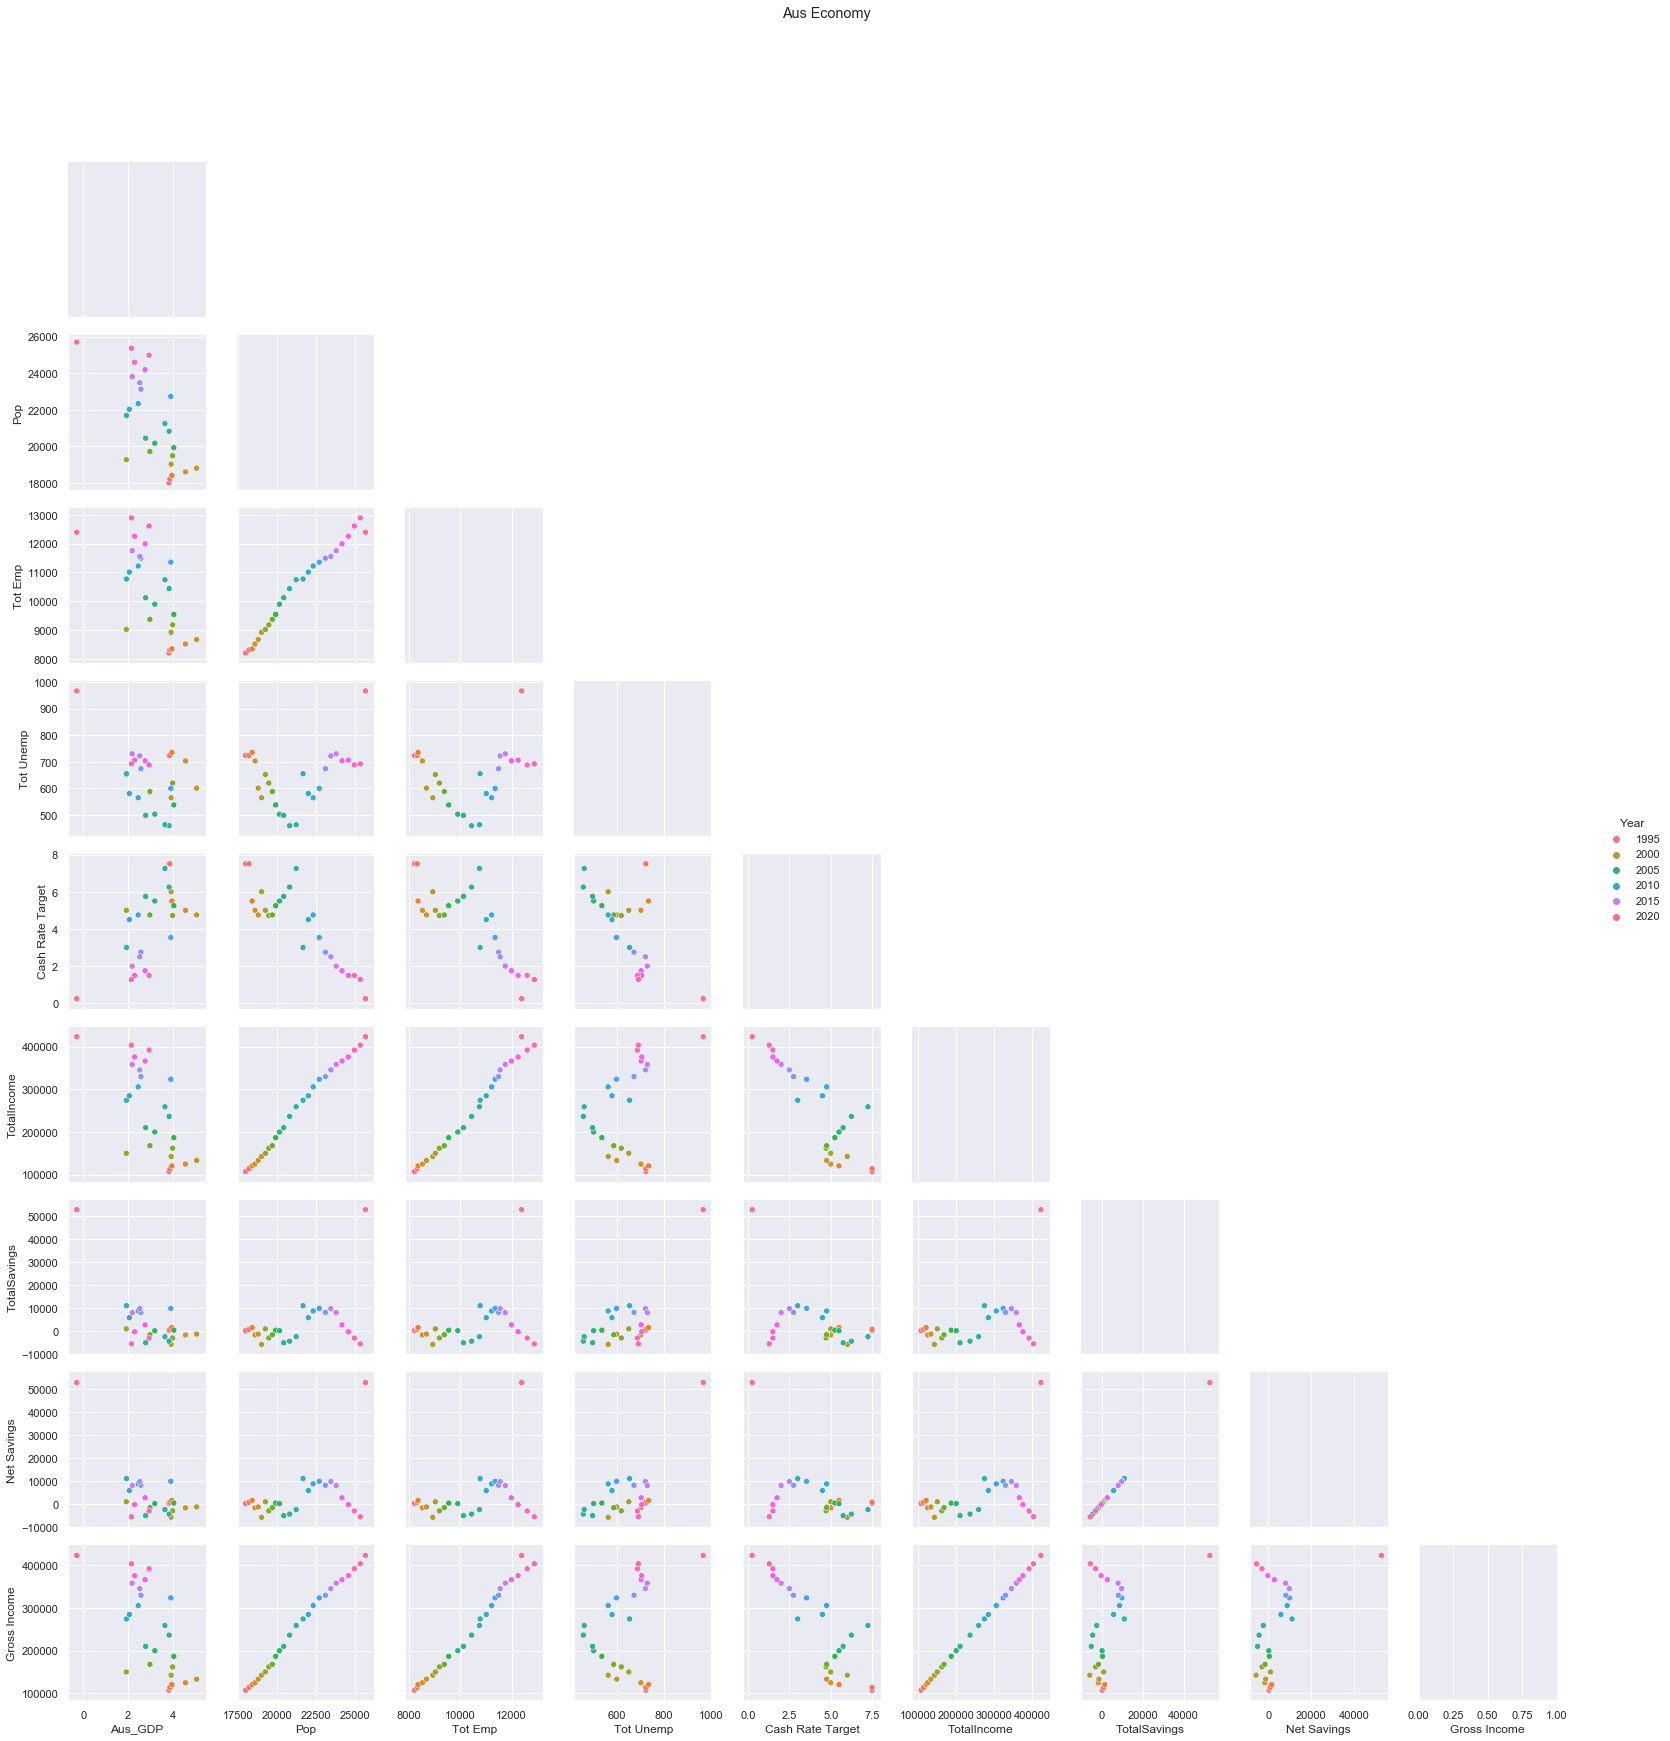

In [29]:
# Create lower triangle using Seaborn
correlation_renamed_df['Year'] = population[["Year"]]

seaborn_corrplot = sns.pairplot(correlation_renamed_df[['Year','Aus_GDP', 'Pop', 'Tot Emp', 'Tot Unemp', 'Cash Rate Target', 
                                                        'TotalIncome', 'TotalSavings', 'Net Savings', 'Gross Income']],
                                hue='Year', palette='husl', markers="o", diag_kind='kde', corner=True)


seaborn_corrplot.fig.suptitle('Feature Relations')
seaborn_corrplot.fig.suptitle("Aus Economy", y=1.08) 

plt.show()
seaborn_corrplot.savefig("../Images/CorrelationPairPlot_Aus_all.png")

## 

## 

## Read in all csv files for analysis for World

## GDP growth

In [30]:
# Get world data 
gdp_growth = pd.read_csv("../Data/ProcessedData/aus_vs_world_gdp_growth_cleaned.csv")
goods_export = pd.read_csv("../Data/ProcessedData/aus_vs_world_goods_export_cleaned.csv")
world_inflation = pd.read_csv("../Data/ProcessedData/aus_vs_world_inflation_cleaned.csv")
world_population = pd.read_csv("../Data/ProcessedData/aus_vs_world_population_cleaned.csv")

In [31]:
# Create line plot for GDP growth rate across all countries
gdp_growth_clean = gdp_growth.drop('Unnamed: 0', axis=1).set_index("Year")

gdp_growth_line = gdp_growth_clean.hvplot.line(title='GDP growth',
                                               ylabel='Percentage change')
gdp_growth_line

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [32]:
# Create bar plot for GDP growth rate across all countries
gdp_growth["Year"] = gdp_growth.Year.astype(str)

gdp_growth_clean2 = gdp_growth.drop('Unnamed: 0', axis=1)
gdp_growth_bar = gdp_growth_clean2.hvplot.bar(groupby="Year")
gdp_growth_bar

:DynamicMap   [Year]
   :Bars   [index,Variable]   (value)

In [33]:
# Combine the plots for GDP growth rate across all countries
gdp_growth_comb = gdp_growth_line + gdp_growth_bar
gdp_growth_comb

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Year]   (value)
   .DynamicMap.I :DynamicMap   [Year]
      :Bars   [index,Variable]   (value)

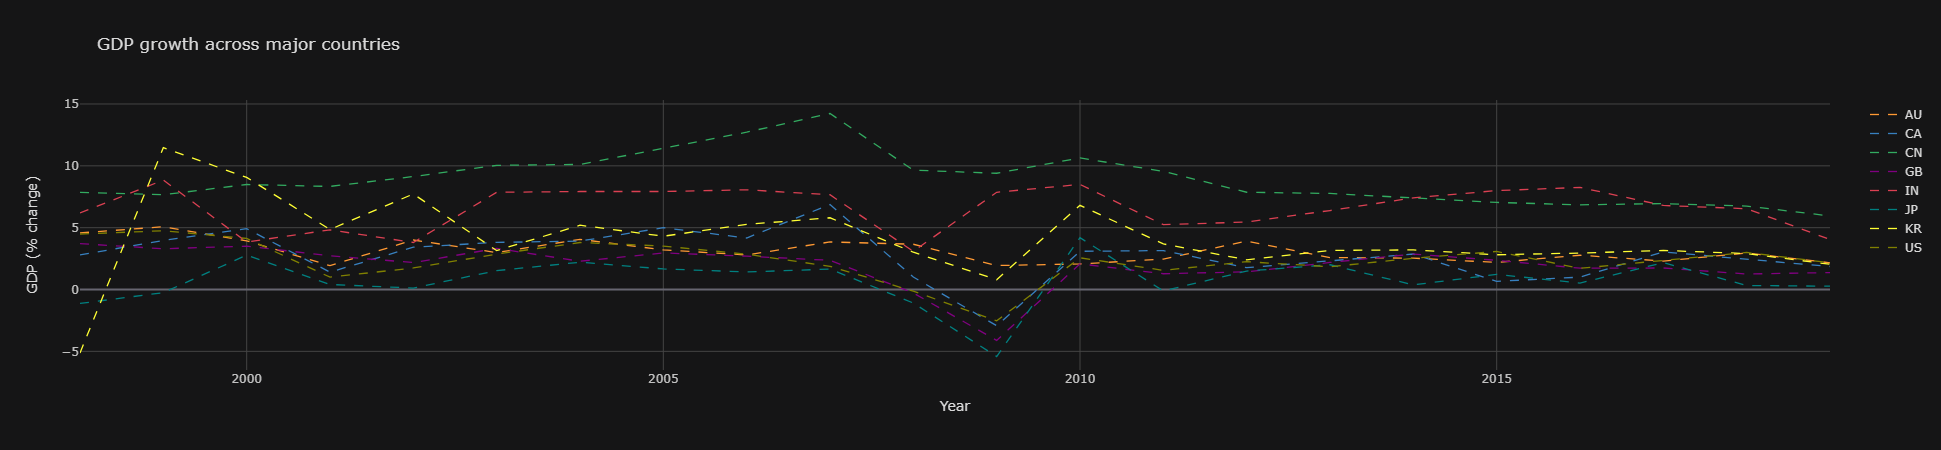

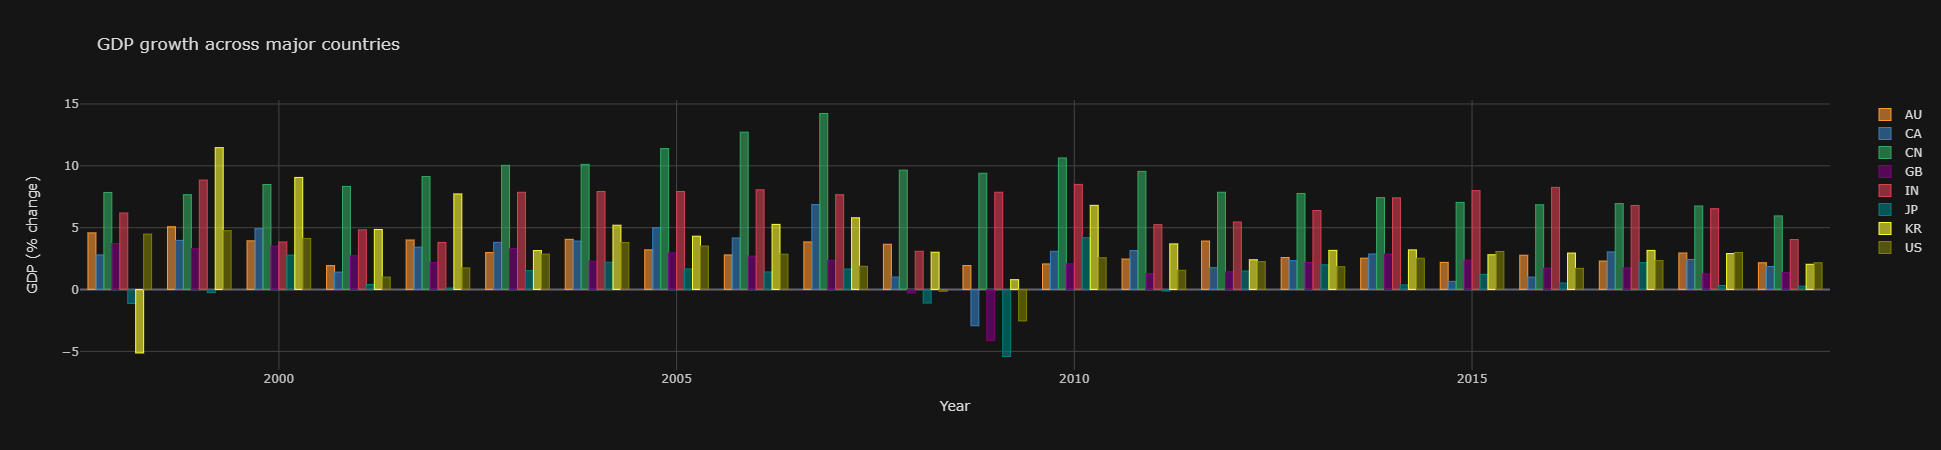

Layout({
    'height': 600,
    'template': '...',
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.575, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.425]}
})

In [58]:
# Create line plot and bar graph using Cufflinks
gdp_growth_fig1 = gdp_growth_clean.iplot(kind='line',
                                         dash='dash',
                                         title="GDP growth across major countries",
                                         xTitle="Year",
                                         yTitle='GDP (% change)')             
             
gdp_growth_fig2 = gdp_growth_clean.iplot(kind='bar',
                                         dash='dash',
                                         title="GDP growth across major countries",
                                         xTitle="Year",
                                         yTitle='GDP (% change)')

#Create the plot matrix:
fig = subplots.make_subplots(rows=2, cols=1)

#Add traces, use  'add_traces', or 'append_trace'.
fig.add_traces(gdp_growth_fig1)
fig.add_traces(gdp_growth_fig2)

fig['layout'].update(height=600,
                     width=600) 

## 

## Goods export

In [35]:
# Clean world data for goods export and plot line graph
goods_export_clean = goods_export.drop('Unnamed: 0', axis=1).set_index("Year")

goods_export_line = goods_export_clean.hvplot.line(title='Goods export',
                                                   ylabel='Percentage change')
goods_export_line

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [36]:
# Clean bar graph for goods export
goods_export["Year"] = goods_export.Year.astype(str)

goods_export_clean2 = goods_export.drop('Unnamed: 0', axis=1)
goods_export_bar = goods_export_clean2.hvplot.bar(groupby="Year")
goods_export_bar

:DynamicMap   [Year]
   :Bars   [index,Variable]   (value)

In [37]:
# Combine the plots for goods exported from all countries
goods_export_comb = goods_export_line + goods_export_bar
goods_export_comb

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Year]   (value)
   .DynamicMap.I :DynamicMap   [Year]
      :Bars   [index,Variable]   (value)

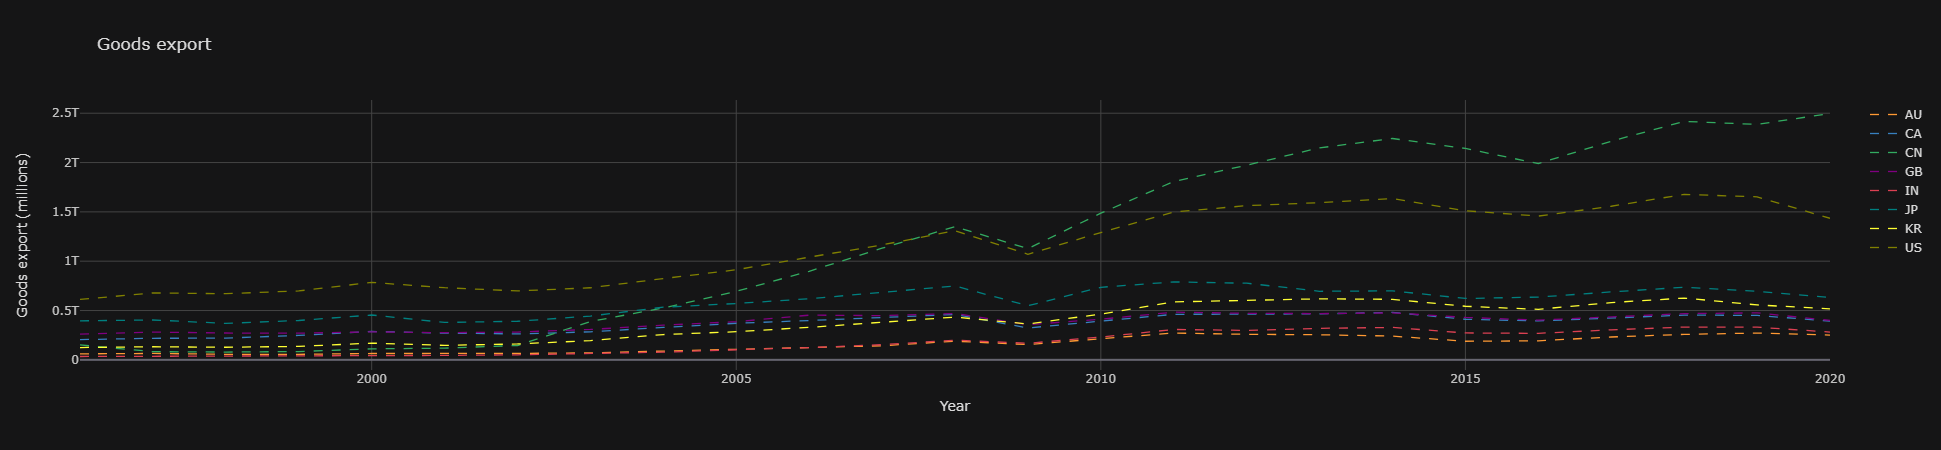

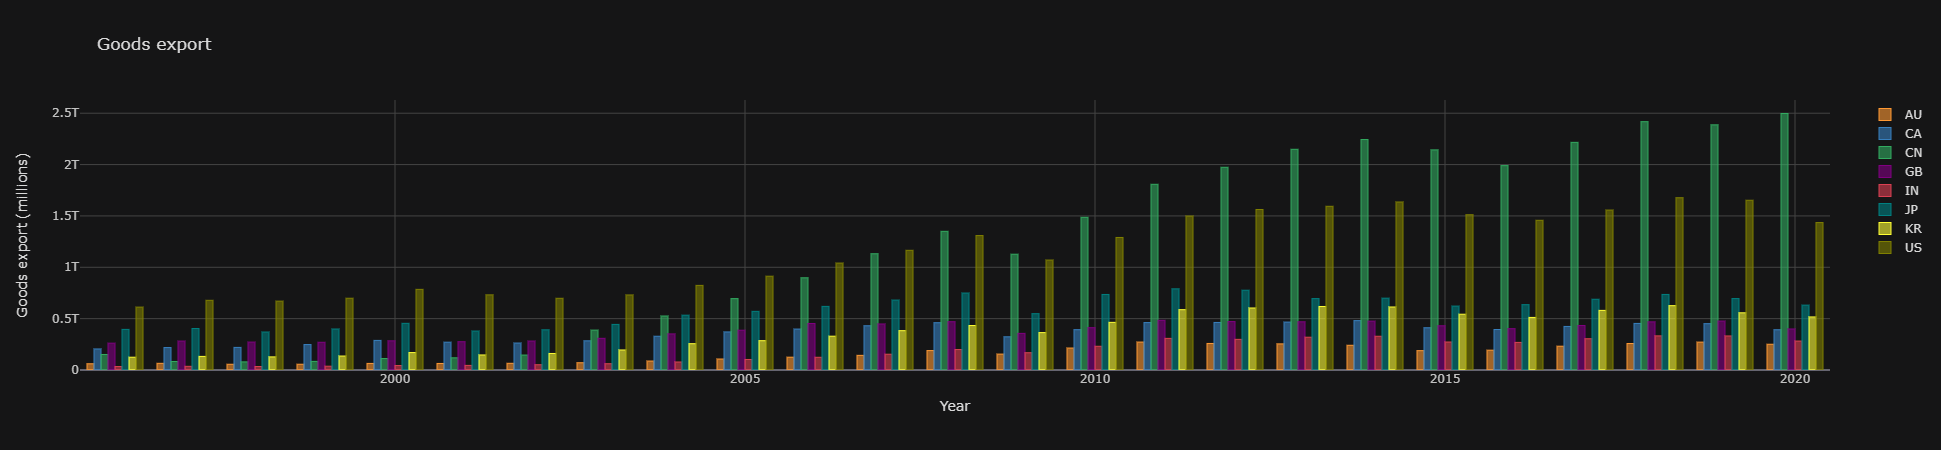

Layout({
    'height': 600,
    'template': '...',
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.575, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.425]}
})

In [57]:
# Create line plot and bar graph using Cufflinks
goods_export_fig1 = goods_export_clean.iplot(kind='line',
                                             dash='dash',
                                             title="Goods export",
                                             xTitle="Year",
                                             yTitle='Goods export (millions)')             
             
goods_export_fig2 = goods_export_clean.iplot(kind='bar',
                                             dash='dash',
                                             title="Goods export",
                                             xTitle="Year",
                                             yTitle='Goods export (millions)')

#Create the plot matrix:
fig = subplots.make_subplots(rows=2, cols=1)

#Add traces, use  'add_traces', or 'append_trace'.
fig.add_traces(goods_export_fig1)
fig.add_traces(goods_export_fig2)

fig['layout'].update(height=600,
                     width=600) 

## 

## World Inflation

In [39]:
# Clean world data for world inflation and plot line graph
world_inflation_clean = world_inflation.drop('Unnamed: 0', axis=1).set_index("Year")

world_inflation_line = world_inflation_clean.hvplot.line(title='World inflation',
                                                         ylabel='Percentage change')
world_inflation_line

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [40]:
# Clean bar graph for world inflation 
world_inflation["Year"] = world_inflation.Year.astype(str)

world_inflation_clean2 = world_inflation.drop('Unnamed: 0', axis=1)
world_inflation_bar = world_inflation_clean2.hvplot.bar(groupby="Year")
world_inflation_bar

:DynamicMap   [Year]
   :Bars   [index,Variable]   (value)

In [41]:
# Combine the plots for goods exported from all countries
world_inflation_comb = world_inflation_line + world_inflation_bar
world_inflation_comb

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Year]   (value)
   .DynamicMap.I :DynamicMap   [Year]
      :Bars   [index,Variable]   (value)

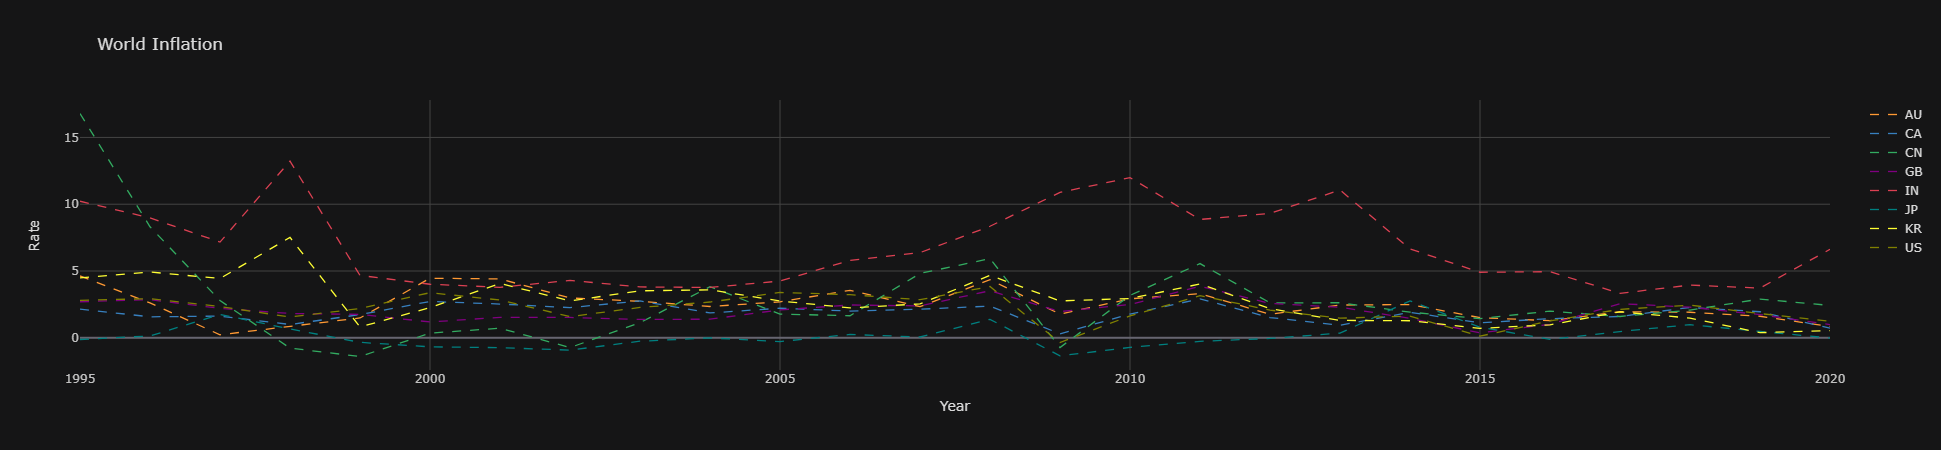

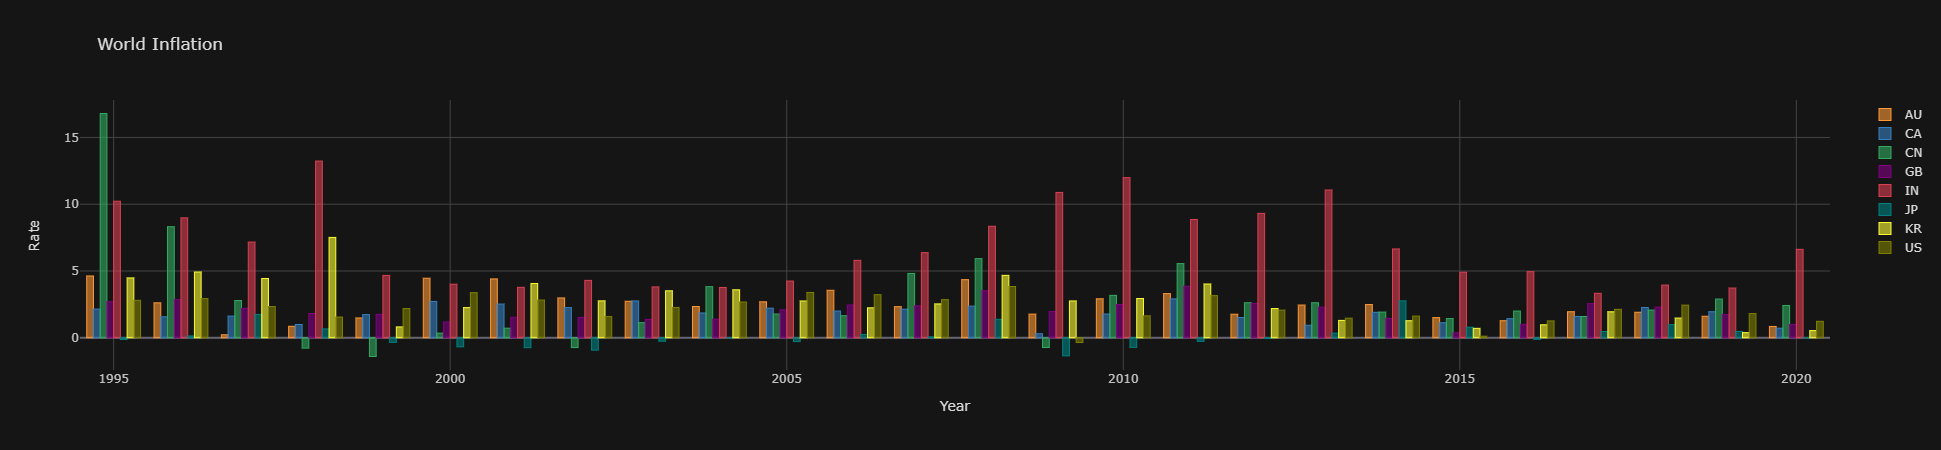

Layout({
    'height': 600,
    'template': '...',
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.575, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.425]}
})

In [56]:
# Create line plot and bar graph using Cufflinks
world_inflation_fig1 = world_inflation_clean.iplot(kind='line',
                                             dash='dash',
                                             title="World Inflation",
                                             xTitle="Year",
                                             yTitle='Rate')             
             
world_inflation_fig2 = world_inflation_clean.iplot(kind='bar',
                                             dash='dash',
                                             title="World Inflation",
                                             xTitle="Year",
                                             yTitle='Rate')

#Create the plot matrix:
fig = subplots.make_subplots(rows=2, cols=1)

#Add traces, use  'add_traces', or 'append_trace'.
fig.add_traces(world_inflation_fig1)
fig.add_traces(world_inflation_fig2)

fig['layout'].update(height=600,
                     width=600) 

## 

## World Population

In [43]:
# Clean world data for world population and plot line graph
world_population_clean = world_population.drop('Unnamed: 0', axis=1).set_index("Year")

world_population_line = world_population_clean.hvplot.line(title='World population',
                                                           ylabel='Percentage change')
world_population_line

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [44]:
# Clean bar graph for world population 
world_population["Year"] = world_population.Year.astype(str)

world_population_clean2 = world_population.drop('Unnamed: 0', axis=1)
world_population_bar = world_population_clean2.hvplot.bar(groupby="Year")
world_population_bar

:DynamicMap   [Year]
   :Bars   [index,Variable]   (value)

In [45]:
# Combine the plots for goods exported from all countries
world_population_comb = world_population_line + world_population_bar
world_population_comb

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Year]   (value)
   .DynamicMap.I :DynamicMap   [Year]
      :Bars   [index,Variable]   (value)

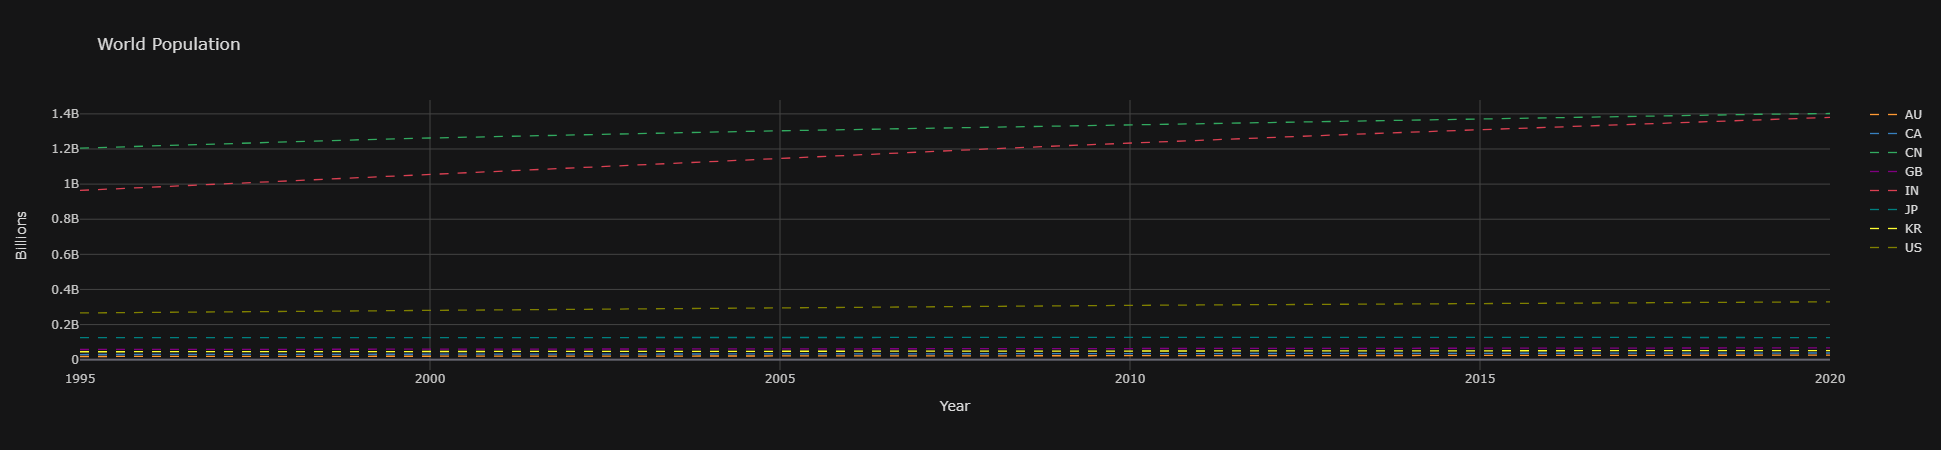

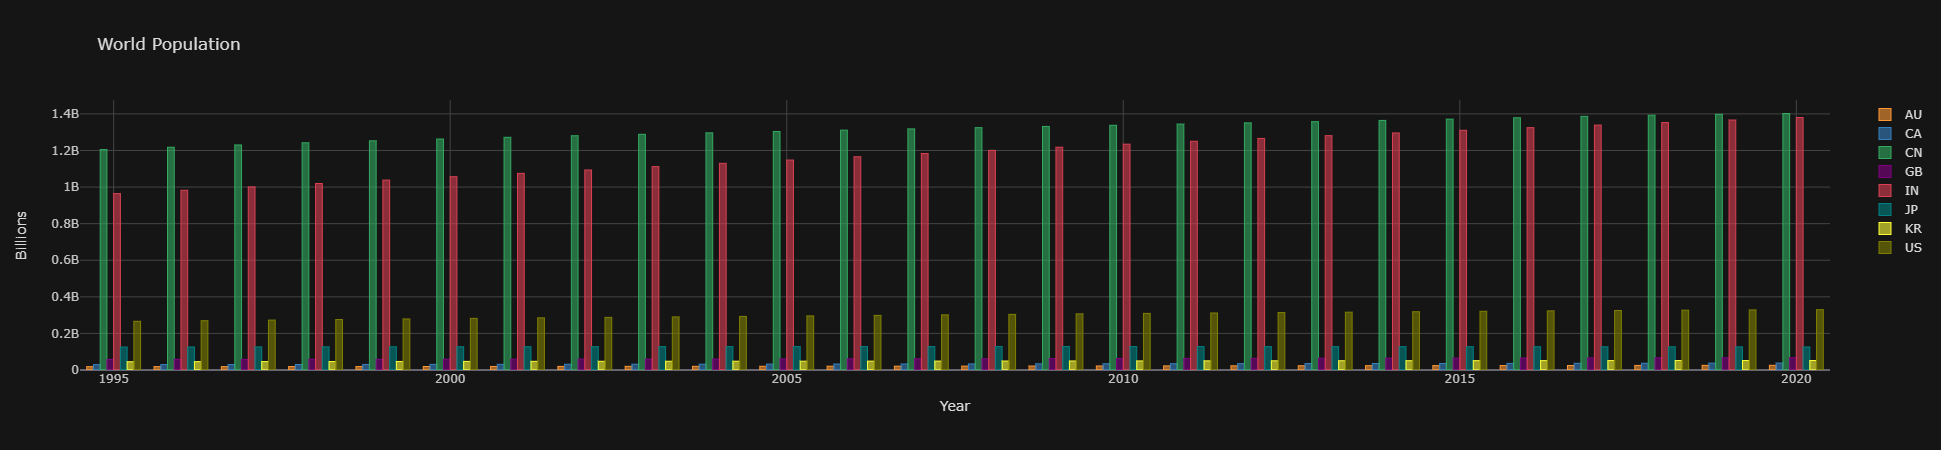

Layout({
    'height': 600,
    'template': '...',
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.575, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.425]}
})

In [55]:
# Create line plot and bar graph using Cufflinks
world_population_fig1 = world_population_clean.iplot(kind='line',
                                                     dash='dash',
                                                     title="World Population",
                                                     xTitle="Year",
                                                     yTitle='Billions')             
             
world_population_fig2 = world_population_clean.iplot(kind='bar',
                                                     dash='dash',
                                                     title="World Population",
                                                     xTitle="Year",
                                                     yTitle='Billions')

#Create the plot matrix:
fig = subplots.make_subplots(rows=2, cols=1)

#Add traces, use  'add_traces', or 'append_trace'.
fig.add_traces(world_population_fig1)
fig.add_traces(world_population_fig2)

fig['layout'].update(height=600,
                     width=600) 

## 

## All world data combined

In [47]:
# Read in world data and clean it
world_data = pd.read_csv("../Data/RawData/World_data.csv")
world_data.drop("year", axis=1, inplace=True)
world_data.head()

,AU_gdp,AU_gdp_growth,AU_goods_export,AU_inflation,AU_net_income,AU_population,CA_gdp,CA_gdp_growth,CA_goods_export,CA_inflation,...,KR_goods_export,KR_inflation,KR_net_income,KR_population,US_gdp,US_gdp_growth,US_goods_export,US_inflation,US_net_income,US_population
0,3.672164e+11,3.837755,5.330705e+10,4.627767,-1.360998e+10,18072000.0,6.040116e+11,NaN,1.929309e+11,2.148760,...,1.195777e+11,4.480687,-2.122100e+09,45092991.0,7.639749e+12,2.684287,5.752040e+11,2.805420,2.089930e+10,266278000.0
1,4.003027e+11,3.878585,6.051559e+10,2.615385,-1.426600e+10,18311000.0,6.285364e+11,NaN,2.048682e+11,1.570531,...,1.244274e+11,4.924810,-2.214800e+09,45524681.0,8.073122e+12,3.772501,6.121130e+11,2.931204,2.232480e+10,269394000.0
2,4.345680e+11,3.966538,6.496912e+10,0.224888,-1.373516e+10,18517000.0,6.549879e+11,NaN,2.184618e+11,1.621216,...,1.323667e+11,4.439064,-3.167400e+09,45953580.0,8.577554e+12,4.447216,6.783660e+11,2.337690,1.262480e+10,272657000.0
3,3.988991e+11,4.576689,5.584892e+10,0.860135,-1.136180e+10,18711000.0,6.339977e+11,2.796542,2.199484e+11,0.995942,...,1.275390e+11,7.513340,-5.201000e+09,46286503.0,9.062818e+12,4.481408,6.704160e+11,1.552279,4.280100e+09,275854000.0
4,3.886082e+11,5.073599,5.602984e+10,1.483129,-1.188279e+10,18926000.0,6.784100e+11,3.970483,2.477141e+11,1.734843,...,1.360306e+11,0.812997,-5.536800e+09,46616677.0,9.630664e+12,4.753236,6.985240e+11,2.188027,9.969000e+09,279040000.0


In [48]:
# Correlate world data
world_data_corr = world_data.corr()

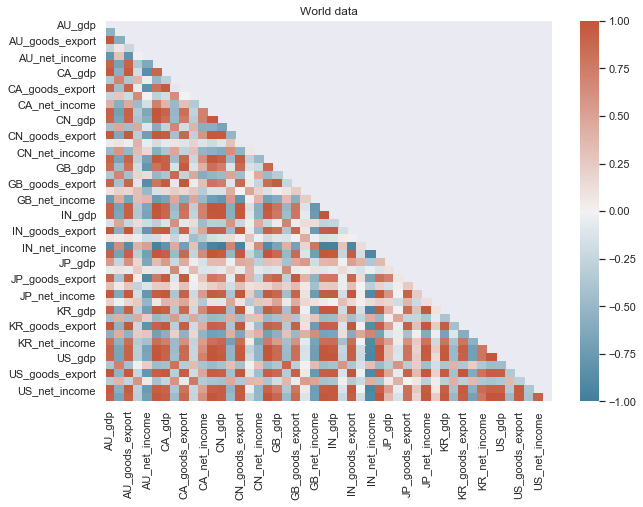

In [49]:
# Create heatmap using Seaborn
matrix = np.triu(world_data_corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
h = plt.axes()

plot = sns.heatmap(world_data_corr, 
                   vmin=-1, 
                   vmax=1, 
                   cmap=cmap, 
                   mask=matrix)


sns.set(rc={'figure.figsize':(10,7)})
h.set_title('World data')
plot.figure.savefig("../Images/World_data_corr.png")

## 

# ASX v S&P500

In [50]:
# Get stock market info
asx_price = asx[["Price"]]
sp500_price = sp500[["Price"]]

In [51]:
asx_price = asx_price.rename(columns={'Price': 'ASX'})
sp500_price = sp500_price.rename(columns={'Price': 'SP500'})

In [52]:
stocks_df = pd.concat([year,
                       asx_price,
                       sp500_price], axis=1)

#Check dataset
stocks_index_df = stocks_df.set_index('Year')
stocks_index_df.head()

,ASX,SP500
Year,,
1995,"1,981.00",544.75
1996,"2,171.80",670.63
1997,"2,664.70",885.14
1998,"2,620.10","1,133.84"
1999,"2,903.70","1,372.71"


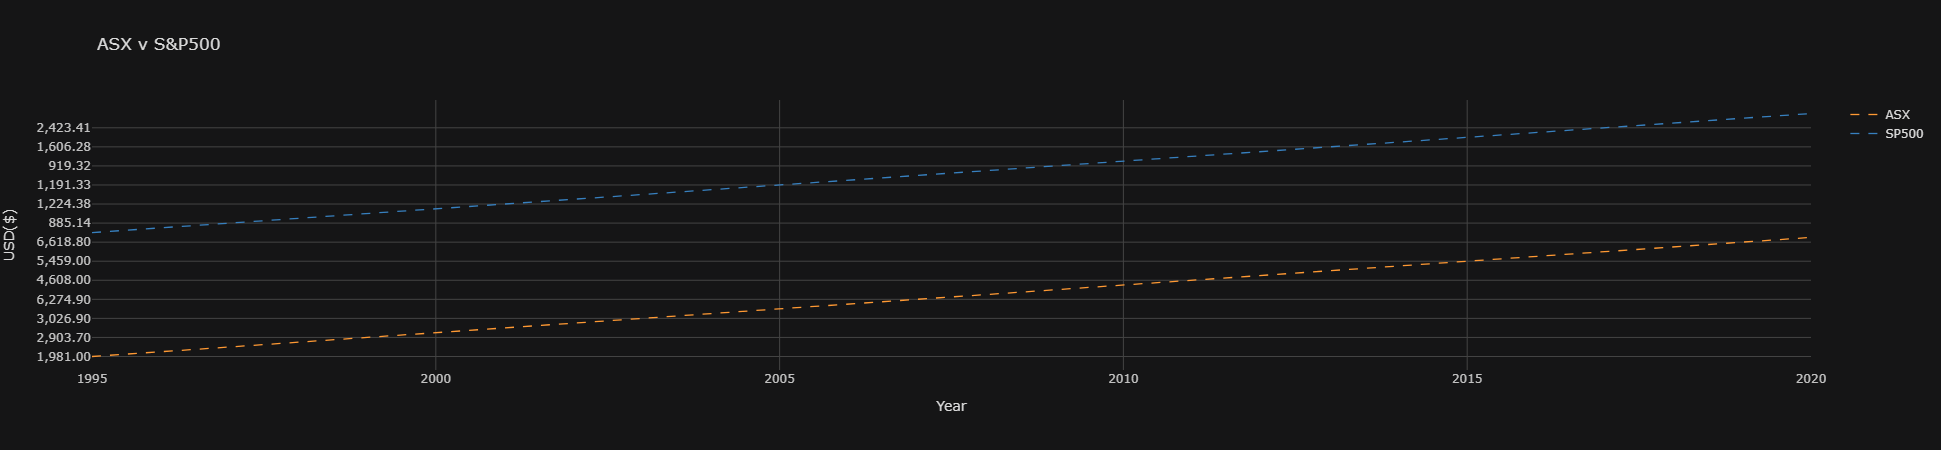

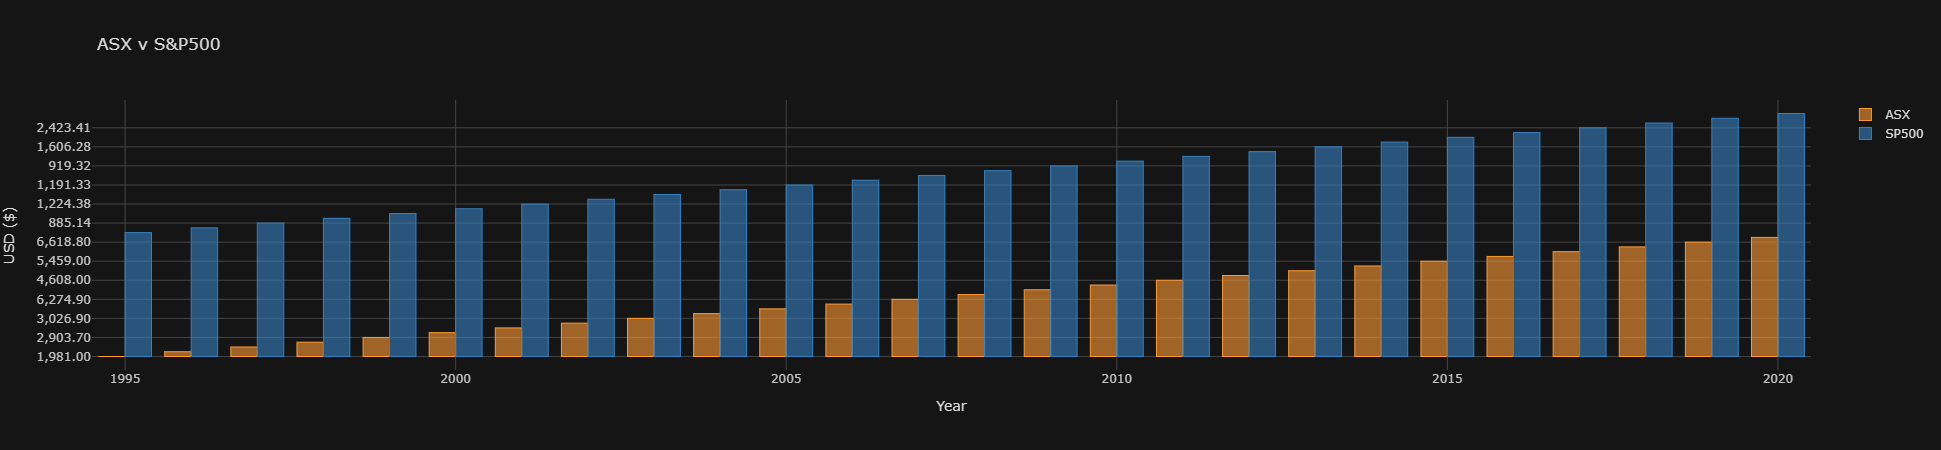

Layout({
    'height': 600,
    'template': '...',
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.575, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.425]}
})

In [54]:
# Create plots using Cufflinks
stocks_df_fig1 = stocks_index_df.iplot(kind='line',
                                       dash='dash',
                                       title="ASX v S&P500",
                                       xTitle="Year",
                                       yTitle='USD($)',
                                       asImage=True)             
             
stocks_df_fig2 = stocks_index_df.iplot(kind='bar',
                                       dash='dash',
                                       title="ASX v S&P500",
                                       xTitle="Year",
                                       yTitle='USD ($)',
                                       asImage=True)

#Create the plot matrix:
fig = subplots.make_subplots(rows=2, cols=1)

#Add traces, use  'add_traces', or 'append_trace'.
fig.add_traces(stocks_df_fig1)
fig.add_traces(stocks_df_fig2)

fig['layout'].update(height=600,
                     width=600) 